In [7]:
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import pickle as pk
import numpy as np

# These are the JK results
filen='/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl'
filen='/global/cscratch1/sd/aamon/Y3data_sompz_redmagic_v0.40_bothw_180720/2pt/shear_shear_pixellized.pkl'
try:
    df = pk.load(open(filen,'rb'))
except:
    df = pk.load(open(filen,'rb'),encoding='latin1')


from astropy.io import fits
des_theory = fits.open('/global/cscratch1/sd/aamon/y3-3x2pt-methods/cosmosis/data_vectors/2pt_NG_BLINDED_Aug20cov_xcorrGGL_27072020_SOMPZWZsamples_pit.fits')

nbins = 4
bins1 = np.array([1,2,3,4])
bins2 = np.array([1,2,3,4])


No handles with labels found to put in legend.


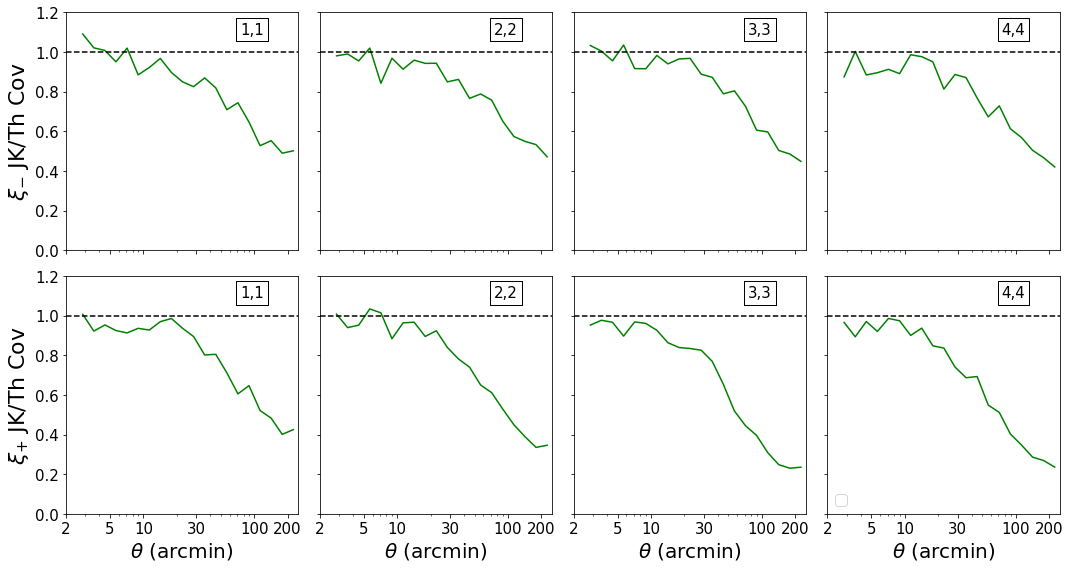

In [19]:
fig, ax = plt.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
        
        bin1 = des_theory['xip'].data['BIN1']
        bin2 = des_theory['xip'].data['BIN2']
        
        ind_sel = np.where((bin1 == bins1[j2]) & (bin2 == bins2[j2]))[0]
        if len(ind_sel) == 0:
            ind_sel = np.where((bin1 == bins2[j2]) & (bin2 == bins1[j2]))[0]
        
        if j1 == 0:
            data_val = des_theory['xim'].data['VALUE'][ind_sel]
            data_ang = des_theory['xim'].data['ANG'][ind_sel]
            cov = des_theory['COVMAT'].data[200:400,200:400][ind_sel,:][:,ind_sel]
            sig = np.sqrt(np.diag(cov))


            try:
                yk_g = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['xim']  #['shearshear_y3']
                yk_th_g = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['meanr']
                #yk_th_g = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['theta'] * 180. /np.pi
                yk_err = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['cov_xim_jack']['err']
            except:
                yk_g = df[str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['xim']
                #yk_th_g = df[str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['theta'] * 180. /np.pi
                yk_err = df[str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['cov_xim_jack']['err']

            
            
            sig_th_interp = interpolate.interp1d(np.log(data_ang),np.log(sig),fill_value='extrapolate')
            sig_th_jkang = np.exp(sig_th_interp(np.log(yk_th_g)))
            ax[j1,j2].plot(yk_th_g, (yk_err/sig_th_jkang)**2, ls='-',marker='',color='green')            
            
            
        if j1 == 1:
            data_val = des_theory['xip'].data['VALUE'][ind_sel]
            data_ang = des_theory['xip'].data['ANG'][ind_sel]
            cov = des_theory['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]
            sig = np.sqrt(np.diag(cov))


            try:
                yk_g = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['xip']
                #yk_th_g = df['shearshear_y3'][str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['theta'] * 180. /np.pi
                yk_err = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['cov_xip_jack']['err']
            except:
                yk_g = df[str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['xip']
                #yk_th_g = df['shearshear_y3'][str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['theta'] * 180. /np.pi
                yk_err = df[str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['cov_xip_jack']['err']
            

            sig_th_interp = interpolate.interp1d(np.log(data_ang),np.log(sig),fill_value='extrapolate')
            sig_th_jkang = np.exp(sig_th_interp(np.log(yk_th_g)))
            ax[j1,j2].plot(yk_th_g, (yk_err/sig_th_jkang)**2, ls='-',marker='',color='green')


        ax[j1,j2].set_ylim(0.,1.2)
        ax[j1,j2].axhline(1.0,ls='--',color='k')    
        ax[j1,j2].set_xscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
        ax[j1,j2].set_xlim((2,250))
        

        ax[0,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


        jc += 1

ax[0,0].set_ylabel(r'$\xi_{-}$ JK/Th Cov', size = 22)
ax[1,0].set_ylabel(r'$\xi_{+}$ JK/Th Cov', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
plt.ylim(0.,1.2)
plt.tight_layout()

In [20]:
filen='/global/cscratch1/sd/aamon/Y3data_sompz_redmagic_v0.40_bothw_180720/2pt/shear_pos_pixellized.pkl'
try:
    df = pk.load(open(filen,'rb'))
except:
    df = pk.load(open(filen,'rb'),encoding='latin1')
    
print(df['0_0'].keys())

dict_keys(['logr', 'rnom', 'meanr', 'meanlogr', 'gammat_compens', 'gammat_compens_jack', 'gammat_compens_im', 'gammat_compens_im_jack', 'gammat', 'gammat_jack', 'cov_gammat_jack', 'gammat_rndm', 'gammat_rndm_jack', 'cov_gammat_rndm_jack', 'gammat_im', 'gammat_im_jack', 'cov_gammat_im_jack', 'gammat_im_rndm', 'gammat_im_rndm_jack', 'cov_gammat_im_rndm_jack', 'npairs', 'npairs_rndm', 'weight', 'weight_rndm'])


KeyError: 'xim'

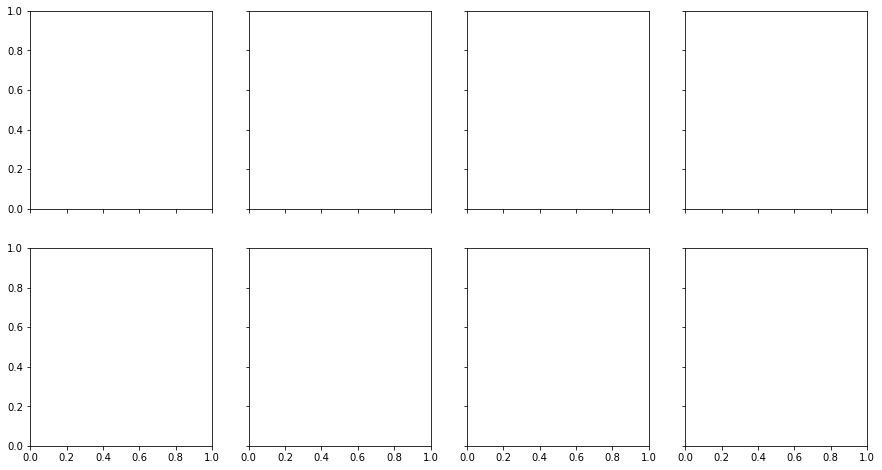

In [21]:
#I SHOULD DO THIS FOR GGL AND WTHETA TOO 

fig, ax = plt.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(5):    
    for j2 in range(4):
        
        bin1 = des_theory['xip'].data['BIN1']
        bin2 = des_theory['xip'].data['BIN2']
        
        ind_sel = np.where((bin1 == bins1[j2]) & (bin2 == bins2[j2]))[0]
        if len(ind_sel) == 0:
            ind_sel = np.where((bin1 == bins2[j2]) & (bin2 == bins1[j2]))[0]
        
        if j1 == 0:
            data_val = des_theory['xim'].data['VALUE'][ind_sel]
            data_ang = des_theory['xim'].data['ANG'][ind_sel]
            cov = des_theory['COVMAT'].data[200:400,200:400][ind_sel,:][:,ind_sel]
            sig = np.sqrt(np.diag(cov))


            try:
                yk_g = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['xim']  #['shearshear_y3']
                yk_th_g = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['meanr']
                #yk_th_g = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['theta'] * 180. /np.pi
                yk_err = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['cov_xim_jack']['err']
            except:
                yk_g = df[str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['xim']
                #yk_th_g = df[str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['theta'] * 180. /np.pi
                yk_err = df[str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['cov_xim_jack']['err']

            
            
            sig_th_interp = interpolate.interp1d(np.log(data_ang),np.log(sig),fill_value='extrapolate')
            sig_th_jkang = np.exp(sig_th_interp(np.log(yk_th_g)))
            ax[j1,j2].plot(yk_th_g, (yk_err/sig_th_jkang)**2, ls='-',marker='',color='green')            
            
            
        if j1 == 1:
            data_val = des_theory['xip'].data['VALUE'][ind_sel]
            data_ang = des_theory['xip'].data['ANG'][ind_sel]
            cov = des_theory['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]
            sig = np.sqrt(np.diag(cov))


            try:
                yk_g = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['xip']
                #yk_th_g = df['shearshear_y3'][str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['theta'] * 180. /np.pi
                yk_err = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['cov_xip_jack']['err']
            except:
                yk_g = df[str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['xip']
                #yk_th_g = df['shearshear_y3'][str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['theta'] * 180. /np.pi
                yk_err = df[str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['cov_xip_jack']['err']
            

            sig_th_interp = interpolate.interp1d(np.log(data_ang),np.log(sig),fill_value='extrapolate')
            sig_th_jkang = np.exp(sig_th_interp(np.log(yk_th_g)))
            ax[j1,j2].plot(yk_th_g, (yk_err/sig_th_jkang)**2, ls='-',marker='',color='green')


        ax[j1,j2].set_ylim(0.,1.2)
        ax[j1,j2].axhline(1.0,ls='--',color='k')    
        ax[j1,j2].set_xscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
        ax[j1,j2].set_xlim((2,250))
        

        ax[0,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


        jc += 1

ax[0,0].set_ylabel(r'$\xi_{-}$ JK/Th Cov', size = 22)
ax[1,0].set_ylabel(r'$\xi_{+}$ JK/Th Cov', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
plt.ylim(0.,1.2)
plt.tight_layout()